# Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from base.preprocess_clustering import Preprocess_Clustering
from base.plot import Plots
from base.AnomalyDetection import AnomalyDetection

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Olympic\AppData\Local\Programs\Python\P

In [3]:
preprocess_clustering = Preprocess_Clustering()
plots = Plots()
anomalyDetection = AnomalyDetection()

object created
plotting ...


# 1. Load and Preprocess Data

In [4]:
data = preprocess_clustering.load_data(path="Data/NormalBehavior_events.log")
data

,time,Command_v1,id,Source,Destination,Command_v2,Time_integer
1,0.275,brightnessLevel:41,1,LightSensor,Controller,brightnessLevel,0
2,0.291,lightOn,10,Controller,ElectricityPower,lightOn,0
3,0.450,temperature:11,2,Thermostat,Controller,temperature,0
4,0.468,heaterOn,10,Controller,Heater,heaterOn,0
5,0.608,ElectricityLevelOfBulbs:9,4,ElectricySensor4Bulbs,Controller,ElectricityLevelOfBulbs,0
...,...,...,...,...,...,...,...
90014,28958.007,temperature:31.911001000933446,2,Thermostat,Controller,temperature,28958
90016,28959.017,brightnessLevel:90,1,LightSensor,Controller,brightnessLevel,28959
90017,28959.017,temperature:31.279120844796644,2,Thermostat,Controller,temperature,28959
90019,28960.008,brightnessLevel:90,1,LightSensor,Controller,brightnessLevel,28960


In [5]:
data['Command_v2'].value_counts()

Command_v2
brightnessLevel             28961
temperature                 28961
ElectricityLevelOfHeater      966
ElectricityLevelOfBulbs       603
heaterOn                      483
heaterOff                     483
lightOn                       302
lightOff                      301
Name: count, dtype: int64

In [6]:
df = preprocess_clustering.prepration_data(data, 28960, 1)
df

,index,Command_v2,tokenized_sents
0,0,brightnessLevel lightOn temperature heaterOn E...,"[brightnesslevel, lighton, temperature, heater..."
1,1,brightnessLevel temperature,"[brightnesslevel, temperature]"
2,2,brightnessLevel lightOff ElectricityLevelOfBul...,"[brightnesslevel, lightoff, electricitylevelof..."
3,3,brightnessLevel temperature,"[brightnesslevel, temperature]"
4,4,brightnessLevel temperature,"[brightnesslevel, temperature]"
...,...,...,...
28956,28956,brightnessLevel temperature,"[brightnesslevel, temperature]"
28957,28957,brightnessLevel temperature,"[brightnesslevel, temperature]"
28958,28958,brightnessLevel temperature,"[brightnesslevel, temperature]"
28959,28959,brightnessLevel temperature,"[brightnesslevel, temperature]"


In [7]:
command = list(df.tokenized_sents.values)

In [8]:
max_sequence_length, vocab_size, encoder_input_data, decoder_input_data, decoder_target_data = anomalyDetection.prepare4Seq2Seq(command)

# 2. Sequence to Sequence Model

In [9]:
history, model = anomalyDetection.seq2seq(max_sequence_length, vocab_size, encoder_input_data, decoder_input_data, 
                                          decoder_target_data, 32, 64, 'softmax', 
                                         'sparse_categorical_crossentropy', 'accuracy', 50, 32, 0.2)

Epoch 1/50
724/724 [==============================] - 18s 17ms/step - loss: 0.1292 - accuracy: 0.9698 - val_loss: 0.0176 - val_accuracy: 0.9901
Epoch 2/50
724/724 [==============================] - 11s 15ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.0039 - val_accuracy: 0.9989
Epoch 3/50
724/724 [==============================] - 11s 15ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 5.5331e-04 - val_accuracy: 1.0000
Epoch 4/50
724/724 [==============================] - 11s 15ms/step - loss: 9.8714e-04 - accuracy: 0.9998 - val_loss: 8.4361e-04 - val_accuracy: 1.0000
Epoch 5/50
724/724 [==============================] - 15s 21ms/step - loss: 2.5141e-04 - accuracy: 1.0000 - val_loss: 1.4090e-04 - val_accuracy: 1.0000
Epoch 6/50
724/724 [==============================] - 11s 15ms/step - loss: 1.6219e-04 - accuracy: 1.0000 - val_loss: 1.1719e-04 - val_accuracy: 1.0000
Epoch 7/50
724/724 [==============================] - 11s 15ms/step - loss: 4.0864e-04 - accuracy: 0.9999 - 

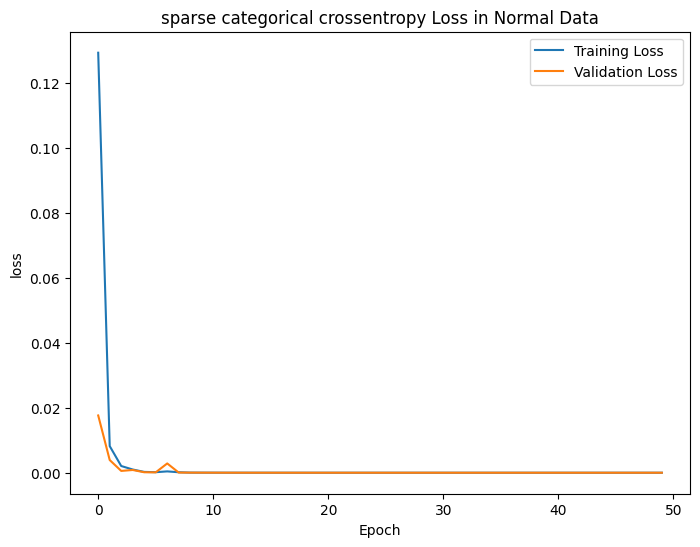

In [10]:
plots.valid_train_loss_plot(history, 'sparse categorical crossentropy Loss in Normal Data')

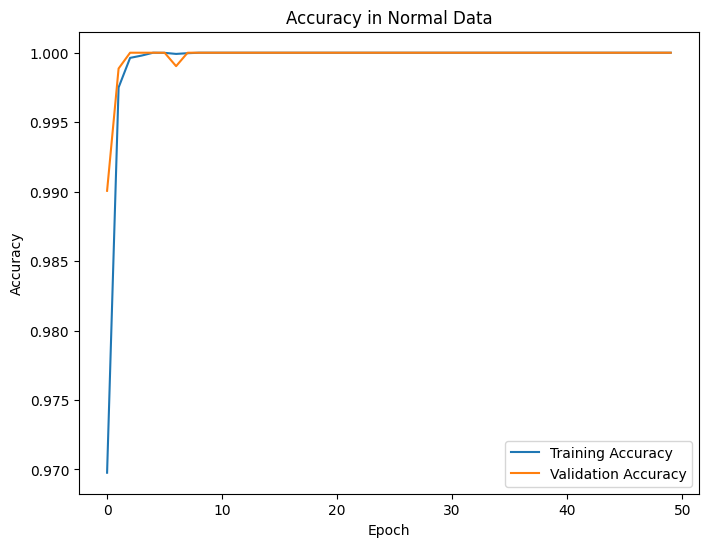

In [11]:
plots.valid_train_accuracy_plot(history, 'Accuracy in Normal Data')

In [12]:
df_anomaly = data.drop(data.index[-1])
df_anomaly = preprocess_clustering.prepration_data(df_anomaly, 28960, 1)
command_anomaly = list(df_anomaly.tokenized_sents.values)
command_anomaly[-1].append('null')

In [13]:
command_anomaly[-3:]

[['brightnesslevel', 'temperature'],
 ['brightnesslevel', 'temperature'],
 ['brightnesslevel', 'null']]

In [14]:
miss_command = anomalyDetection.predict_miss_sensor(command_anomaly[-3:], model, max_sequence_length)

1/1 [==============================] - 3s 3s/step
[['temperature'], ['temperature'], ['temperature']]
